In [ ]:
!pip install -U git+https://github.com/qubvel/efficientnet

In [ ]:
import efficientnet.keras as enet
from keras.backend import sigmoid
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, BatchNormalization

In [ ]:
def swish_act(x, beta = 1):
    return (x * sigmoid(beta * x))

In [ ]:
model = enet.EfficientNetB0(include_top=False, input_shape=(32,32,3), pooling='avg') # u can add weights='imagenet'

In [ ]:
# Adding 2 fully-connected layers to B0.
x = model.output

x = BatchNormalization()(x)
x = Dropout(0.7)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)
x = Dropout(0.5)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)

# Output layer
predictions = Dense(10, activation="softmax")(x)

model_final = Model(inputs = model.input, outputs = predictions)

model_final.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 stem_conv (Conv2D)             (None, 16, 16, 32)   864         ['input_5[0][0]']                
                                                                                                  
 stem_bn (BatchNormalization)   (None, 16, 16, 32)   128         ['stem_conv[0][0]']              
                                                                                                  
 stem_activation (Activation)   (None, 16, 16, 32)   0           ['stem_bn[0][0]']                
                                                                                            

In [ ]:
from tensorflow.keras.utils import plot_model

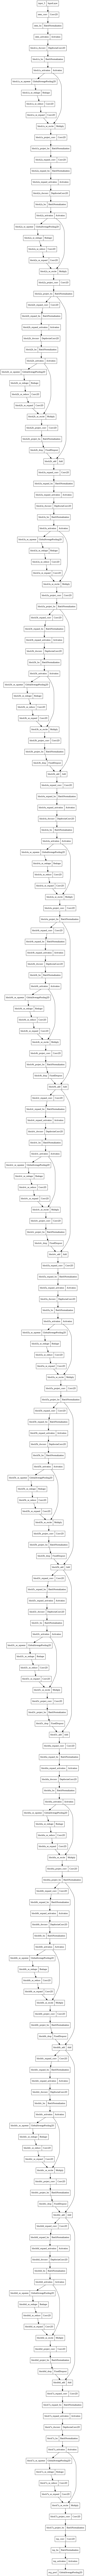

In [ ]:
plot_model(model)

# EfficientNet-B7

In [ ]:
model1 = enet.EfficientNetB7(include_top=False, input_shape=(32,32,3), pooling='avg')

258434480/258434480 [==============================] - 11s 0us/step


In [ ]:
model1.summary()

Model: "efficientnet-b7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 stem_conv (Conv2D)             (None, 16, 16, 64)   1728        ['input_1[0][0]']                
                                                                                                  
 stem_bn (BatchNormalization)   (None, 16, 16, 64)   256         ['stem_conv[0][0]']              
                                                                                                  
 stem_activation (Activation)   (None, 16, 16, 64)   0           ['stem_bn[0][0]']                
                                                                                    